In [1]:
#%run input/Format.ipynb
import ROOT as root
from array import array
root.gErrorIgnoreLevel = root.kFatal
%jsroot on

Welcome to JupyROOT 6.30/06


In [2]:
#from ipywidgets import interact, interactive
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import ipywidgets as widgets
import asyncio
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import plotly
import math
import time
%matplotlib ipympl

In [3]:
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
     
widgets.interact(say_my_name, name=["Yuri", "Iurii", "James Bond"])

interactive(children=(Dropdown(description='name', options=('Yuri', 'Iurii', 'James Bond'), value='Yuri'), Out…

<function __main__.say_my_name(name)>

In [4]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

In [5]:
#set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

In [6]:

fig1, ax1 = plt.subplots()

x1 = np.linspace(0,10,100)
def animate(t):
    plt.cla()
    plt.plot(x1-t,x1)
    plt.xlim(0,10)

matplotlib.animation.FuncAnimation(fig1, animate, frames=10)

In [7]:

def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))

anim_fig1, anim_ax1 = plt.subplots()

xsin1 = np.linspace(0, 2 * np.pi, 100)
def animate(t):
    plt.cla()
    plt.plot(my_sine(xsin1-t,1,1,0),xsin1)
    plt.xlim(- 2 * np.pi, 2 * np.pi)

matplotlib.animation.FuncAnimation(anim_fig1, animate, frames=10)

In [8]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 0.4
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )


def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))

anim_fig1, anim_ax1 = plt.subplots()

xsin1 = np.linspace(0, 2 * np.pi, 100)
def animate(t):
    plt.cla()
    plt.plot(my_sine(xsin1-t,1,1,0),xsin1)
    anim_ax1.plot( a, b )
    plt.xlim(- 2 * np.pi, 2 * np.pi)

matplotlib.animation.FuncAnimation(anim_fig1, animate, frames=10)

In [9]:
def get_intersections(x0, y0, r0, x1, y1, r1):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    # non intersecting
    if d > r0 + r1 :
        return None
    # One circle within other
    if d < abs(r0-r1):
        return None
    # coincident circles
    if d == 0 and r0 == r1:
        return None
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h=math.sqrt(r0**2-a**2)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=x2+h*(y1-y0)/d     
        y3=y2-h*(x1-x0)/d 

        x4=x2-h*(y1-y0)/d
        y4=y2+h*(x1-x0)/d
        
        return (x3, y3, x4, y4)


In [10]:
X_limits = [-20,1]
Y_limits = [-10, 10]
R_def = 29
Fix_point = [-0, 0]
t_jumps = [0,0,0,6,6,6,8,8,8,7,7,7,6.2,6.2,6.2]
R_VTX = [2.5,5,13,18]

In [11]:
intersect3_0 = get_intersections(0,0,R_VTX[3],0,R_def-t_jumps[0],R_def-t_jumps[0])
theta3_0 = math.atan2(intersect3_0[3],intersect3_0[2])
intersect3_1 = get_intersections(0,0,R_VTX[3],0,R_def-t_jumps[3*1],R_def-t_jumps[3*1])

intersect2_0 = get_intersections(0,0,R_VTX[2],0,R_def-t_jumps[3*1],R_def-t_jumps[3*1])
theta2_0 = math.atan2(intersect2_0[3],intersect2_0[2])
intersect2_1 = get_intersections(0,0,R_VTX[2],0,R_def-t_jumps[3*2],R_def-t_jumps[3*2])

intersect1_0 = get_intersections(0,0,R_VTX[1],0,R_def-t_jumps[3*2],R_def-t_jumps[3*2])
theta1_0 = math.atan2(intersect1_0[3],intersect1_0[2])
intersect1_1 = get_intersections(0,0,R_VTX[1],0,R_def-t_jumps[3*3],R_def-t_jumps[3*3])

intersect0_0 = get_intersections(0,0,R_VTX[0],0,R_def-t_jumps[3*3],R_def-t_jumps[3*3])
theta0_0 = math.atan2(intersect0_0[3],intersect0_0[2])
intersect0_1 = get_intersections(0,0,R_VTX[0],0,R_def-t_jumps[3*4],R_def-t_jumps[3*4])
print(theta3_0,theta2_0,theta1_0,theta0_0)

2.8260369044914335 2.8550800720077323 3.0222620287821664 3.084743856196817


In [12]:
theta = np.linspace( -5.5*np.pi/4 , -2.5*np.pi/4 , 150 )
  
a = np.cos( theta )
b = np.sin( theta )


def my_track(x, x0, y0, R):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return (y0 - ( R**2 - ( x - x0 )**2 )**0.5  ) + ( R**2 - ( Fix_point[0] )**2 )**0.5 + Fix_point[1]

print(my_track(-17,0,0,29))

5.50531975105854


In [13]:
anim_fig1, anim_ax1 = plt.subplots()

xsin1 = np.linspace(X_limits[0], 5, 100)
def animate(intime):
    t = int(intime/1)
    plt.cla()
    plt.plot(xsin1,my_track(xsin1,0,0,R_def-t_jumps[t]))
    plt.plot(xsin1,my_track(xsin1,0,0,R_def), 'g--', linewidth=3)
    anim_ax1.plot( R_VTX[0]*a, R_VTX[0]*b )
    anim_ax1.plot( R_VTX[1]*a, R_VTX[1]*b )
    anim_ax1.plot( R_VTX[2]*a, R_VTX[2]*b )
    anim_ax1.plot( R_VTX[3]*a, R_VTX[3]*b )


    if t>0:
        theta3 = np.linspace( theta3_0-0.12 , theta3_0 + 0.12, 10 )
        a3 = np.cos( theta3 )
        b3 = np.sin( theta3 )
        anim_ax1.plot( R_VTX[3]*a3, R_VTX[3]*b3, linewidth=5 )
        if t>1:   
            anim_ax1.plot(intersect3_1[2],intersect3_1[3], 'go') 
    if t>3:
        theta2 = np.linspace( theta2_0-0.1 , theta2_0 + 0.1, 10 )
        a2 = np.cos( theta2 )
        b2 = np.sin( theta2 )
        anim_ax1.plot( R_VTX[2]*a2, R_VTX[2]*b2, linewidth=5 )  
        if t>4:
            anim_ax1.plot(intersect2_1[2],intersect2_1[3], 'go')  
    if t>6:
        theta1 = np.linspace( theta1_0-0.08 , theta1_0 + 0.08, 10 )
        a1 = np.cos( theta1 )
        b1 = np.sin( theta1 )
        anim_ax1.plot( R_VTX[1]*a1, R_VTX[1]*b1, linewidth=5 )  
        if t>7:
            anim_ax1.plot(intersect1_1[2],intersect1_1[3], 'go') 
    if t>9:
        theta0 = np.linspace( theta0_0-0.06 , theta0_0 + 0.06, 10 )
        a0 = np.cos( theta0 )
        b0 = np.sin( theta0 )
        anim_ax1.plot( R_VTX[0]*a0, R_VTX[0]*b0, linewidth=5 )  
        if t>10:
            anim_ax1.plot(intersect0_1[2],intersect0_1[3], 'go')     

    anim_ax1.set_xlim(X_limits)
    anim_ax1.set_ylim(Y_limits)
    #plt.xlim(- 2 * np.pi, 2 * np.pi)


matplotlib.animation.FuncAnimation(anim_fig1, animate, frames=15)


In [14]:
ani = matplotlib.animation.FuncAnimation(anim_fig1, animate, frames=15)
ani.save(filename="output/association.gif", writer="pillow")

In [15]:
iOption0 = 1
part = 0
N_files = 4
N_loc_files = 2

In [16]:
size = 100000

import pandas as pd
df = pd.DataFrame({
   'x': np.random.normal(size=size),
   'y': np.random.normal(size=size)
})
df.head()

,x,y
0,0.270376,-0.100818
1,-0.009641,-0.163039
2,0.721215,-0.001011
3,-0.134776,0.944371
4,2.964582,1.359798


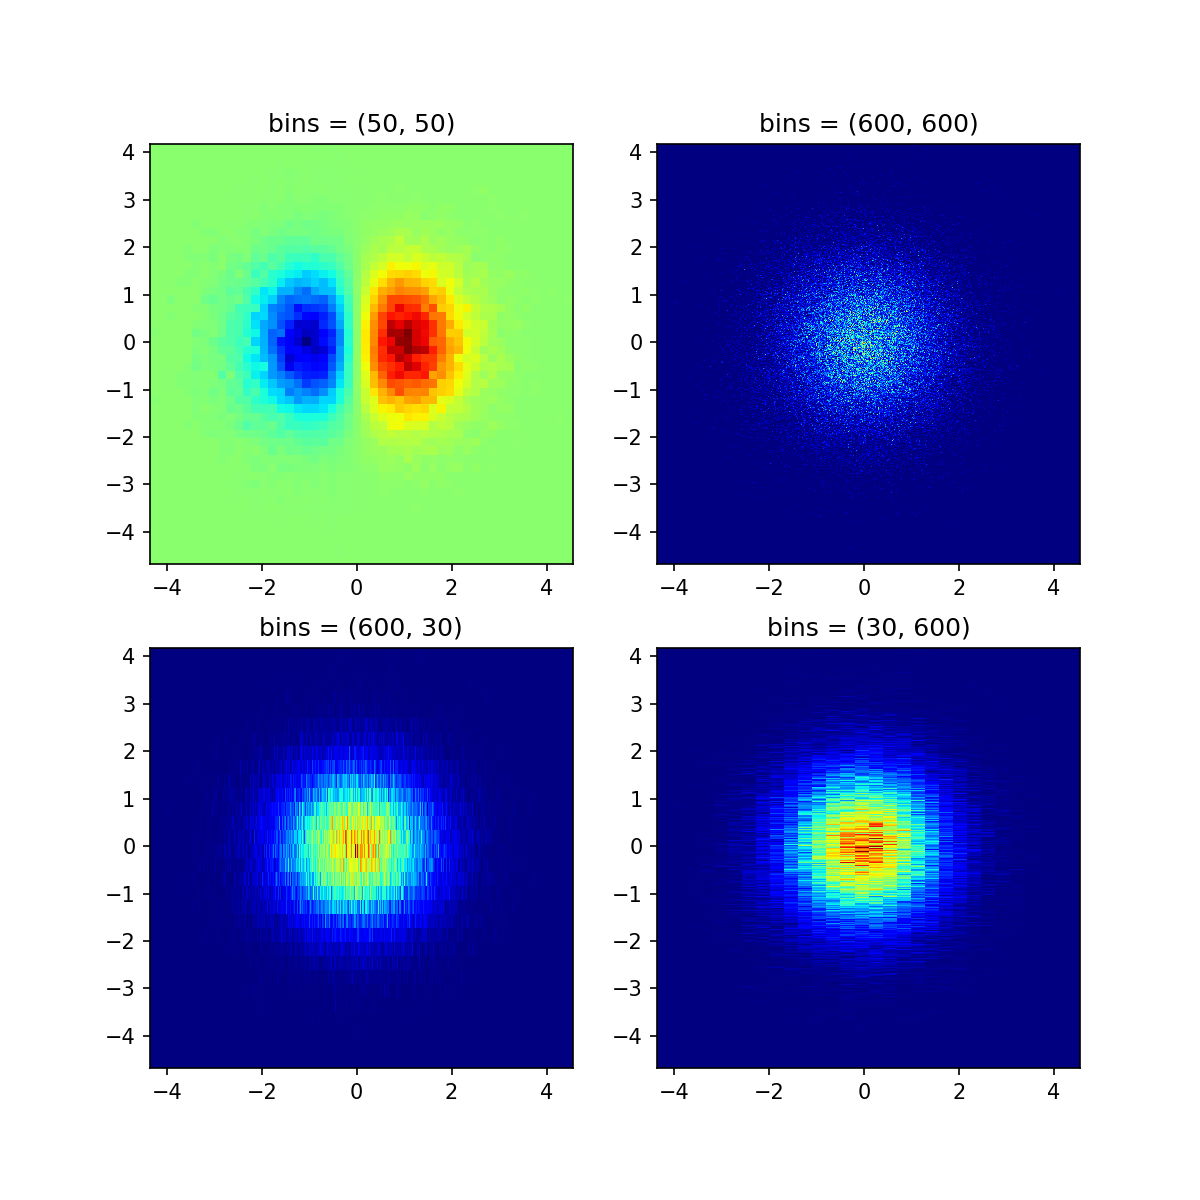

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
x = df['x']
w=  df['x']*2
y=df['y']
# Big bins
axs[0,0].hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet, weights =w)
axs[0, 0].set_title('bins = (50, 50)')
 
# Small bins
axs[0,1].hist2d(x, y, bins=(600, 600), cmap=plt.cm.jet)
axs[0, 1].set_title('bins = (600, 600)')
 
# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,0].hist2d(x, y, bins=(600, 30), cmap=plt.cm.jet)
axs[1, 0].set_title('bins = (600, 30)')

# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,1].hist2d(x, y, bins=(30, 600), cmap=plt.cm.jet)
axs[1, 1].set_title('bins = (30, 600)')

plt.show()

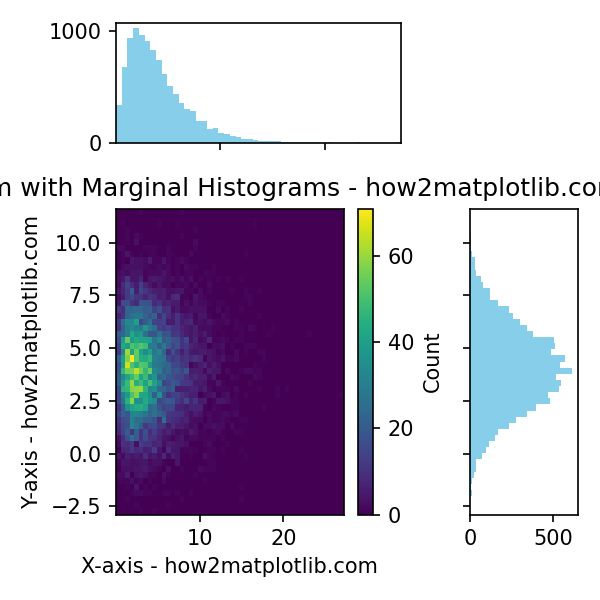

Correlation coefficient: 0.0002


In [40]:
# Generate random data
np.random.seed(42)
x = np.random.gamma(2, 2, 10000)
y = np.random.normal(4, 2, 10000)

# Create the main figure and axes
fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(3, 3)
ax_main = fig.add_subplot(gs[1:, :-1])
ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)

# Create the 2D histogram
hist, x_edges, y_edges, im = ax_main.hist2d(x, y, bins=50, cmap='viridis')
fig.colorbar(im, ax=ax_main, label='Count')

# Create the marginal histograms
ax_top.hist(x, bins=50, color='skyblue')
ax_right.hist(y, bins=50, orientation='horizontal', color='skyblue')

# Remove ticks from marginal histograms
ax_top.tick_params(axis="x", labelbottom=False)
ax_right.tick_params(axis="y", labelleft=False)

# Set labels and title
ax_main.set_xlabel('X-axis - how2matplotlib.com')
ax_main.set_ylabel('Y-axis - how2matplotlib.com')
ax_main.set_title('2D Histogram with Marginal Histograms - how2matplotlib.com')

plt.tight_layout()
plt.show()

# Print correlation coefficient
print("Correlation coefficient: {:.4f}".format(np.corrcoef(x, y)[0, 1]))


In [19]:
import functools

rng = np.random.default_rng(seed=19680801)
# Fixing bin edges.
HIST_BINS = np.linspace(-4, 4, 100)

# Histogram our data with numpy.
data = rng.standard_normal(1000)
n, _ = np.histogram(data, HIST_BINS)

def animate(frame_number, bar_container):
    # Simulate new data coming in.
    data = rng.standard_normal(1000)
    n, _ = np.histogram(data, HIST_BINS)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)

    return bar_container.patches
# Output generated via `matplotlib.animation.Animation.to_jshtml`.

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

anim = functools.partial(animate, bar_container=bar_container)
ani = matplotlib.animation.FuncAnimation(fig, anim, 50, repeat=False, blit=True)
#plt.show()

In [20]:
N_centr = 5
N_pt = 1
#colors=[1,2,4,root.kGreen+2,root.kMagenta,root.kOrange+4,root.kGray,root.kCyan]
central_bins = [0,100,0,20,20,40,40,60,60,80,80,100]
pt_boarders = [0.5,1.5,1.0,2.0,0,5.0,1.0,5.0,0.5,5]
colors = [3,1,2,4,root.kMagenta,root.kOrange+4,root.kGray,root.kCyan]
file_path="../sim/output/invmass_embed/"
file_names=["bbbar_v1_10M.root","ccbar_v4_12M.root","phi_v9_10M.root","jpsi_v6_10M.root","photon_v2_50M.root"]
part_names = ["b#bar{b}","c#bar{c}","#phi","J/#psi","#gamma#to ee"]
hist_mass_DCA_names = ["inv_mass_dca_fg5","inv_mass_dca_fg7"]
hist_DCA2_names = ["DCA2_hist_0","DCA2_hist_4"]
hist_DCA12_names=["DCA12_hist_0","DCA12_hist_4"]
hists_all = [hist_mass_DCA_names,hist_DCA2_names,hist_DCA12_names]
N_type = len(hists_all)

In [21]:
hists_read = []

for iFile in range(N_files):
    infile = root.TFile.Open(file_path+file_names[iFile], "read")
    hists_emc_read0 = []
    for itype in range(N_type):
        hist_select_3D0 = []
        for ihist in range(len(hists_all[itype])):
            hist_select_3D0.append(infile.Get(hists_all[itype][ihist]))
            hist_select_3D0[-1].SetDirectory(root.nullptr)
            hist_select_3D0[-1].SetName(hist_select_3D0[-1].GetName()+f"{iFile}")
        hists_emc_read0.append(hist_select_3D0)
    hists_read.append(hists_emc_read0)

infile.Close()

In [22]:
legends0 = []
def single_DCA_draw(clock, x = 0.5, y = 1.5, iter= 0):
    type_loc =1
    N_dca_files = 4
    N_type_loc= len(hists_all[type_loc])
    c0 = root.TCanvas(f"c1_{clock}",f"c1_{clock}",1400,450*1)
    c0.Divide(2,1)
    for itype in range(N_type_loc):
        if iter == 1 : legends0.append(root.TLegend(0.65,0.5,0.91,0.88))
        if iter == 1 : Format_Legend(legends0[-1],0.03)
        for iFile in range(0,N_dca_files):
            c0.cd(itype+1)
            ibin0 = hists_read[iFile][type_loc][itype].ProjectionZ().FindBin(x)
            ibin1 = hists_read[iFile][type_loc][itype].ProjectionZ().FindBin(y)
            project = hists_read[iFile][type_loc][itype].ProjectionX(hists_read[iFile][type_loc][itype].GetName()+f"_X{iter}",1,4,ibin0,ibin1)
            clr = colors[iFile]
            Format_Hist_total(project, "DCA_{T} #mum",  "dN/dDCA_{T}, 1/20 #mum^{-1}", 0.15, 0.15, 0, 0,  .07,  0.06, 21,  0, clr,  7,  clr,  1, 1.1, "",  1,  1-0.15*iFile)
            project.GetXaxis().SetRange(project.FindBin(-500),project.FindBin(500))
            #root.gPad.SetLogy()
            if iFile == 0 :
                project.Draw("H")
                max = project.GetMaximum()
            else:
                project.Scale(max/project.GetMaximum())          
                project.Draw("H same")
            if iter == 1 : legends0[-1].AddEntry(project,part_names[iFile],"l")
        legends0[-1].Draw()


    c0.Draw()
    #c0.SaveAs(f"output/single_dca.png")
    return c0

In [23]:
legends, titles = [], []
def pair_DCA_draw(clock, x = 0.5, y = 1.5, iter = 0):
    ipt = 2
    type_loc =0
    N_type_loc= len(hists_all[type_loc])
    c0 = root.TCanvas(f"c2_{clock}",f"c2_{clock}",1400,450*1)
    c0.Divide(2,1)
    N_dca_files = 4
    for itype in range(N_type_loc):
        max = 0

        if iter == 1 : 
            legends.append(root.TLegend(0.75,0.6,0.95,0.95))
            Format_Legend(legends[-1],0.03)
            titles.append(Draw_Legend_Title(0.3,0.85,0.75,0.95,"Au+Au mb sim",0.075))
        for iFile in range(0,N_dca_files):
            c0.cd(itype+1)
            ibinY0 = hists_read[iFile][type_loc][itype].ProjectionY().FindBin(x)
            ibinY1 = hists_read[iFile][type_loc][itype].ProjectionY().FindBin(y)
            ibinZ0 = hists_read[iFile][type_loc][itype].ProjectionZ().FindBin(pt_boarders[2*ipt+0])
            ibinZ1 = hists_read[iFile][type_loc][itype].ProjectionZ().FindBin(pt_boarders[2*ipt+1])
            project = hists_read[iFile][type_loc][itype].ProjectionX(hists_read[iFile][type_loc][itype].GetName()+f"_X{iter}",ibinY0,ibinY1,ibinZ0,ibinZ1)
            clr = colors[iFile]
            Format_Hist_total(project, "DCA_{T} #mum",  "dN/dDCA_{T}, 1/20 #mum^{-1}", 0.15, 0.15,  0.01, 0.01,  .07,  0.06, 21,  0, clr,  7,  clr,  1, 1.1, "",  1,  1-0.15*iFile)
            project.GetXaxis().SetRange(project.FindBin(1),project.FindBin(1100))
            root.gPad.SetLogy()
            if iFile == 0 :
                project.Draw("H")
                max = project.GetMaximum()
            else:
                project.Scale(max/project.GetMaximum())          
                project.Draw("H same")
            if iter == 1 : legends[-1].AddEntry(project,part_names[iFile],"l")
        legends[itype].Draw()
        titles[itype].Draw()


    c0.Draw()
    #c0.SaveAs(f"output/dca2.png")

    return c0

In [24]:
if False:
    c = pair_DCA_draw(1,1.1,2.9,1)
    c.Draw()

In [25]:
clock = 0

In [26]:

clock += 1

slider2 = widgets.FloatRangeSlider(
    value=[1, 3.5],
    min=0.1,
    max=10.0,
    step=0.1,
    description='pT [GeV]:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%'),
)

async def test2(slider2, output):
    i = 0
    while slider2.value[1] < 9:
        i = i+1
        await asyncio.sleep(1)
        output.update('test2 ' + str(slider2.value) + ' - ' + str(i))
        c1= single_DCA_draw(clock, slider2.value[0],slider2.value[1], i)
        if i == 1: c1.Draw()
        else : c1.Update()
    return

output = display("tbd", display_id=True)
display(slider2)


task = asyncio.create_task(test2(slider2, output))

'tbd'

FloatRangeSlider(value=(1.0, 3.5), continuous_update=False, description='pT [GeV]:', layout=Layout(width='50%'…

In [27]:
if True: was_cancelled = task.cancel()

In [28]:

clock += 1

slider2 = widgets.FloatRangeSlider(
    value=[1, 3.5],
    min=0.1,
    max=10.0,
    step=0.1,
    description='Mass [GeV]:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%'),
)

async def test2(slider2, output):
    i = 0
    while slider2.value[1]< 9 and slider2.value[0] < 9:
        i = i+1
        await asyncio.sleep(1)
        output.update('test2 ' + str(slider2.value) + ' - ' + str(i))
        c1= pair_DCA_draw(clock, slider2.value[0],slider2.value[1], i)
        if i == 1: c1.Draw()
        else : c1.Update()
    return

output = display("tbd", display_id=True)
display(slider2)


task2 = asyncio.create_task(test2(slider2, output))

'tbd'

FloatRangeSlider(value=(1.0, 3.5), continuous_update=False, description='Mass [GeV]:', layout=Layout(width='50…

In [29]:
if True: was_cancelled = task2.cancel()

In [30]:
#!jupyter nbconvert --to html test.ipynb --HTMLExporter.theme=dark --no-input

import ipywidgets as widgets
import asyncio

slider = widgets.IntSlider(
    value=5,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

async def test(slider, output):
    i = 0
    while slider.value != 10:
        i = i+1
        await asyncio.sleep(1)
        output.update('test ' + str(slider.value) + ' - ' + str(i))
        x = slider.value 
        c1= single_DCA_draw(slider.value)[0]
        if i == 1: c1.Draw()
        else : c1.Update()

output = display("tbd", display_id=True)
display(slider)

#asyncio.create_task(test(slider, output))